<h1>Initial Cleaning from db</h1>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'
# cases_kpis = data_dir + 'cases_kpis.csv'
cases = data_dir + 'cases.csv'
kpi_class = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Data/new_data/Cases_KPI.csv'

# cases_kpis = pd.read_csv(cases_kpis)
# print(cases_kpis.shape)
cases = pd.read_csv(cases)
print(cases.shape)
kpi_class = pd.read_csv(kpi_class)
print(kpi_class.shape)

(13492, 63)
(77, 9)


In [2]:
cases.head()

,id,name,created,last_modified,client_nickname,client_phonenumber,client_line_account,client_facebook_account,client_viber_account,client_share_info_consent,...,debt_bondage_broker,debt_bondage_detail_broker,issue_getting_better,issue_getting_better_description,issue_workers_affected,issue_workers_affected_description,case_status_id,issue_legacy_level,case_id,kpi_id
0,41,NaN,2018-11-17,2019-03-01,NaN,NaN,NaN,NaN,NaN,Not sure; forgot to ask and need to check back...,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
1,62,NaN,2018-11-18,2020-08-11,NaN,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,2.0,62.0,55.0
2,70,NaN,2018-11-17,2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,70.0,29.0
3,73,NaN,2018-11-19,2019-03-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,93,NaN,2018-11-19,2019-09-08,NaN,NaN,NaN,NaN,NaN,Not sure; forgot to ask and need to check back...,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN


In [3]:
kpi_class.head()

,id,description,level,goal,kpi_category_id,Boyu - abuse including RA,Boyu - abuse excluding RA,Joann - abuse including RA,Joann - abuse restricted to employer only
0,1,Lack of professional conduct of recruitment ag...,2,Recruiters and employers should treat each oth...,1,1,1,0,0
1,2,Treated poorly and/or threatened by RA or brok...,3,Recruiters and employers should treat each oth...,1,1,0,1,0
2,3,"Inaccurate, misleading, or poor information ab...",2,"Job advertisements should be comprehensive, up...",1,0,0,1,0
3,4,Document retention,3,Jobseekers and workers are in control of their...,1,1,1,1,1
4,6,Fees charged by upstream/village-level broker:...,2,"In ethical recruitment arrangements, fees can ...",1,0,0,0,0


In [4]:
print('%s cases' % cases.shape[0])
print('%s has empty date' % sum(pd.isnull(cases.created)))
print('%s has empty province' % sum(pd.isnull(cases.province_id)))

13492 cases
0 has empty date
3025 has empty province


In [5]:
kpi_choice1 = 'Boyu - abuse including RA'
kpi_choice2 = 'Boyu - abuse excluding RA'
kpi_choice3 = 'Joann - abuse including RA'
kpi_choice4 = 'Joann - abuse restricted to employer only'
cases_cols = ['created','client_ethnicity_id', 'client_gender_id', 'client_nationality_id', 'client_status_id', 
              'country_id', 'district_id', 'province_id', 'client_origin_country_id', 
              'client_origin_province_id', 'supplier_id', 'kpi_id']

cases_lean = cases[cases_cols]
cases_lean = cases_lean[pd.notnull(cases.created)]
cases_lean = cases_lean[cases_lean.created >='2017']
cases_lean = cases_lean[pd.notnull(cases.province_id)]
print('%s cases after cleaning' % cases_lean.shape[0])

cases1 = pd.merge(cases_lean, kpi_class[['id', kpi_choice1]], how='left', left_on='kpi_id', right_on='id')
cases2 = pd.merge(cases_lean, kpi_class[['id', kpi_choice2]], how='left', left_on='kpi_id', right_on='id')
cases3 = pd.merge(cases_lean, kpi_class[['id', kpi_choice3]], how='left', left_on='kpi_id', right_on='id')
cases4 = pd.merge(cases_lean, kpi_class[['id', kpi_choice4]], how='left', left_on='kpi_id', right_on='id')
print(cases1.shape, cases2.shape, cases3.shape, cases4.shape)

10467 cases after cleaning
(10467, 14) (10467, 14) (10467, 14) (10467, 14)


In [32]:
# old

# kpi_choice1 = 'Boyu - abuse including RA'
# kpi_choice2 = 'Boyu - abuse excluding RA'
# kpi_choice3 = 'Joann - abuse including RA'
# kpi_choice4 = 'Joann - abuse restricted to employer only'
# cases_cols = ['created','client_ethnicity_id', 'client_gender_id', 'client_nationality_id', 'client_status_id', 
#               'country_id', 'district_id', 'province_id', 'client_origin_country_id', 
#               'client_origin_province_id', 'supplier_id', 'kpi_id']

# cases_lean = cases[cases_cols]
# cases_lean = cases_lean[pd.notnull(cases.created)]
# cases_lean = cases_lean[cases_lean.created >='2017']
# cases_lean = cases_lean[pd.notnull(cases.province_id)]
# print('%s cases after cleaning' % cases_lean.shape[0])

# cases1 = pd.merge(cases_lean, kpi_class[['id', kpi_choice1]], how='left', left_on='kpi_id', right_on='id')
# cases2 = pd.merge(cases_lean, kpi_class[['id', kpi_choice2]], how='left', left_on='kpi_id', right_on='id')
# cases3 = pd.merge(cases_lean, kpi_class[['id', kpi_choice3]], how='left', left_on='kpi_id', right_on='id')
# cases4 = pd.merge(cases_lean, kpi_class[['id', kpi_choice4]], how='left', left_on='kpi_id', right_on='id')
# print(cases1.shape, cases2.shape, cases3.shape, cases4.shape)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


8951 cases after cleaning
(8951, 14) (8951, 14) (8951, 14) (8951, 14)


In [6]:
cases1['abuse'] = cases1[kpi_choice1]==1
cases2['abuse'] = cases2[kpi_choice2]==1
cases3['abuse'] = cases3[kpi_choice3]==1
cases4['abuse'] = cases4[kpi_choice4]==1

In [7]:
cases1.head()

,created,client_ethnicity_id,client_gender_id,client_nationality_id,client_status_id,country_id,district_id,province_id,client_origin_country_id,client_origin_province_id,supplier_id,kpi_id,id,Boyu - abuse including RA,abuse
0,2018-11-17,1.0,1.0,5.0,3.0,8.0,NaN,70.0,8.0,51.0,5685.0,NaN,NaN,NaN,False
1,2018-11-18,1.0,2.0,5.0,3.0,8.0,367.0,119.0,8.0,49.0,391.0,55.0,55.0,0.0,False
2,2018-11-17,NaN,1.0,5.0,3.0,8.0,NaN,105.0,8.0,NaN,1083.0,29.0,29.0,1.0,True
3,2018-11-19,1.0,1.0,5.0,3.0,8.0,NaN,114.0,8.0,51.0,NaN,NaN,NaN,NaN,False
4,2018-11-19,1.0,1.0,5.0,11.0,8.0,369.0,77.0,8.0,49.0,5685.0,NaN,NaN,NaN,False


In [9]:
print(sum(pd.isnull(cases1['Boyu - abuse including RA'])))
cases1['Boyu - abuse including RA'].value_counts()

6294


1.0    3376
0.0     797
Name: Boyu - abuse including RA, dtype: int64

In [8]:
# number of abuse cases according each classification
print(sum(cases1.abuse), sum(cases2.abuse), sum(cases3.abuse), sum(cases4.abuse))

3376 3194 3377 3187


In [9]:
cases1.to_csv(data_dir + 'cases_boyu_incl.csv', index=False)
cases2.to_csv(data_dir + 'cases_boyu_excl.csv', index=False)
cases3.to_csv(data_dir + 'cases_joann_incl.csv', index=False)
cases4.to_csv(data_dir + 'cases_joann_excl.csv', index=False)

# some descriptive stats

In [2]:
cases1 = pd.read_csv(data_dir + 'cases_boyu_incl.csv')
cases1.head()

,created,client_ethnicity_id,client_gender_id,client_nationality_id,client_status_id,country_id,district_id,province_id,client_origin_country_id,client_origin_province_id,supplier_id,kpi_id,id,Boyu - abuse including RA,abuse
0,2018-11-17,1.0,1.0,5.0,3.0,8.0,NaN,70.0,8.0,51.0,5685.0,NaN,NaN,NaN,False
1,2018-11-18,1.0,2.0,5.0,3.0,8.0,367.0,119.0,8.0,49.0,391.0,55.0,55.0,0.0,False
2,2018-11-17,NaN,1.0,5.0,3.0,8.0,NaN,105.0,8.0,NaN,1083.0,29.0,29.0,1.0,True
3,2018-11-19,1.0,1.0,5.0,3.0,8.0,NaN,114.0,8.0,51.0,NaN,NaN,NaN,NaN,False
4,2018-11-19,1.0,1.0,5.0,11.0,8.0,369.0,77.0,8.0,49.0,5685.0,NaN,NaN,NaN,False


In [4]:
sum(pd.notnull(cases1.province_id)), cases1.shape[0]

(10467, 10467)

In [5]:
cases.columns

Index(['id', 'name', 'created', 'last_modified', 'client_nickname',
       'client_phonenumber', 'client_line_account', 'client_facebook_account',
       'client_viber_account', 'client_share_info_consent',
       'issara_supply_chain', 'non_supply_chain', 'description',
       'debt_bondage', 'debt_bondage_detail', 'vot_needs', 'referral_notes',
       'next_steps', 'work_place_details', 'dead_line_date', 'final_remarks',
       'client_contract_type_id', 'client_document_type_id',
       'client_ethnicity_id', 'client_gender_id', 'client_nationality_id',
       'client_status_id', 'client_type_id', 'destination_recruiter_id',
       'issara_staff_id', 'next_steps_issara_staff_id', 'rating_dest_employer',
       'rating_dest_recruiter', 'rating_source_broker',
       'rating_source_recruiter', 'referral_action_id', 'source_recruiter_id',
       'source_upstream_broker', 'supplier_id', 'work_place_id',
       'client_time_at_job', 'country_id', 'district_id', 'province_id',
       'cli

In [7]:
sum(pd.notnull(cases.province_id)), cases.shape[0], sum(pd.notnull(cases.province_id))/cases.shape[0]

(10467, 13492, 0.7757930625555884)

In [11]:
null_count = sum(pd.notnull(cases.supplier_id))
na_count = sum(cases.supplier_id==1083)
total = cases.shape[0]
print(null_count, na_count, total, ((null_count - na_count)/total))

13197 8633 13492 0.33827453305662614


In [9]:
cases.supplier_id.value_counts()

1083.0     8633
5685.0      797
362.0       389
1112.0      299
455.0       280
           ... 
7854.0        1
209.0         1
475.0         1
2639.0        1
14410.0       1
Name: supplier_id, Length: 89, dtype: int64

<h1>some exploration for sanity check<h1>

In [11]:
## some exploration for sanity check
cases_lean.province_id.value_counts()

70.0     2284
123.0    1562
121.0    1010
77.0      925
119.0     479
         ... 
21.0        1
73.0        1
39.0        1
104.0       1
126.0       1
Name: province_id, Length: 82, dtype: int64

In [12]:
print(cases_lean.created.max(), cases_lean.created.min())
cases_lean.created.describe()

2020-12-09 2018-09-01


count          10467
unique           757
top       2020-11-16
freq              78
Name: created, dtype: object

In [13]:
sum(cases_lean.created < '2017'), sum(cases_lean.created >='2017')

(0, 10467)

In [14]:
cases.columns

Index(['id', 'name', 'created', 'last_modified', 'client_nickname',
       'client_phonenumber', 'client_line_account', 'client_facebook_account',
       'client_viber_account', 'client_share_info_consent',
       'issara_supply_chain', 'non_supply_chain', 'description',
       'debt_bondage', 'debt_bondage_detail', 'vot_needs', 'referral_notes',
       'next_steps', 'work_place_details', 'dead_line_date', 'final_remarks',
       'client_contract_type_id', 'client_document_type_id',
       'client_ethnicity_id', 'client_gender_id', 'client_nationality_id',
       'client_status_id', 'client_type_id', 'destination_recruiter_id',
       'issara_staff_id', 'next_steps_issara_staff_id', 'rating_dest_employer',
       'rating_dest_recruiter', 'rating_source_broker',
       'rating_source_recruiter', 'referral_action_id', 'source_recruiter_id',
       'source_upstream_broker', 'supplier_id', 'work_place_id',
       'client_time_at_job', 'country_id', 'district_id', 'province_id',
       'cli

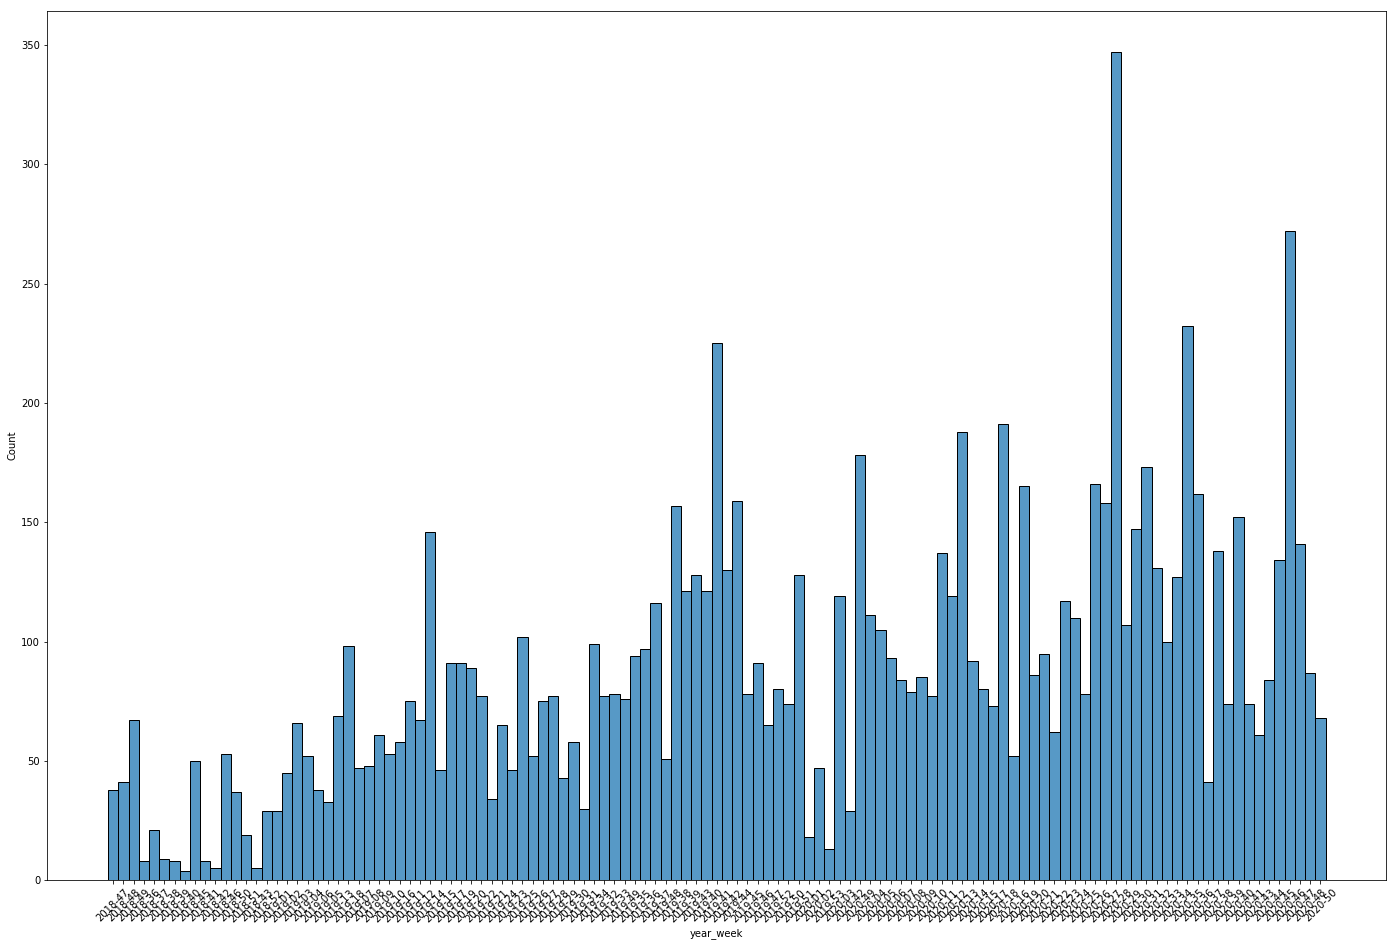

In [18]:
# import seaborn as sns
# from datetime import datetime as dt

# def date_to_year_week(d):
#     year_week = dt.strptime(d, '%Y-%m-%d').strftime('%Y-%W')
#     yr, wk = year_week.split('-')
#     return '%s-%02d' % (yr, (int(wk)+1))

# cases_lean['year_week'] = cases_lean['created'].apply(date_to_year_week)

a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)
histp = sns.histplot(cases_lean.year_week)
for item in histp.get_xticklabels():
    item.set_rotation(45)
plt.show()

In [21]:
sorted(cases_lean.year_week)[:50]

['2018-36',
 '2018-36',
 '2018-36',
 '2018-36',
 '2018-36',
 '2018-36',
 '2018-36',
 '2018-36',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-37',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-38',
 '2018-39',
 '2018-39',
 '2018-39',
 '2018-39',
 '2018-39',
 '2018-39',
 '2018-39',
 '2018-39',
 '2018-40',
 '2018-40',
 '2018-40',
 '2018-40']

In [25]:
cases_lean.groupby('year_week').count()['created'][:20]

year_week
2018-36     8
2018-37    21
2018-38     9
2018-39     8
2018-40     4
2018-41     8
2018-42     5
2018-43     5
2018-45    50
2018-46    53
2018-47    38
2018-48    41
2018-49    67
2018-50    37
2018-51    19
2018-52    29
2019-01    29
2019-02    45
2019-03    66
2019-04    52
Name: created, dtype: int64

# classification description

In [7]:
cases1.columns

Index(['created', 'client_ethnicity_id', 'client_gender_id',
       'client_nationality_id', 'client_status_id', 'country_id',
       'district_id', 'province_id', 'client_origin_country_id',
       'client_origin_province_id', 'supplier_id', 'kpi_id', 'id',
       'Boyu - abuse including RA', 'abuse'],
      dtype='object')

In [8]:
cases.columns

Index(['id', 'name', 'created', 'last_modified', 'client_nickname',
       'client_phonenumber', 'client_line_account', 'client_facebook_account',
       'client_viber_account', 'client_share_info_consent',
       'issara_supply_chain', 'non_supply_chain', 'description',
       'debt_bondage', 'debt_bondage_detail', 'vot_needs', 'referral_notes',
       'next_steps', 'work_place_details', 'dead_line_date', 'final_remarks',
       'client_contract_type_id', 'client_document_type_id',
       'client_ethnicity_id', 'client_gender_id', 'client_nationality_id',
       'client_status_id', 'client_type_id', 'destination_recruiter_id',
       'issara_staff_id', 'next_steps_issara_staff_id', 'rating_dest_employer',
       'rating_dest_recruiter', 'rating_source_broker',
       'rating_source_recruiter', 'referral_action_id', 'source_recruiter_id',
       'source_upstream_broker', 'supplier_id', 'work_place_id',
       'client_time_at_job', 'country_id', 'district_id', 'province_id',
       'cli

In [11]:
sum(pd.isnull(cases.kpi_id)), cases.shape[0]

(8629, 13492)

In [12]:
cases1.abuse.value_counts()

False    7091
True     3376
Name: abuse, dtype: int64

In [13]:
cases1['Boyu - abuse including RA'].value_counts()

1.0    3376
0.0     797
Name: Boyu - abuse including RA, dtype: int64

In [14]:
7091-797

6294

In [16]:
cases.loc[pd.isnull(cases.kpi_id), ['description','referral_notes', 'final_remarks','issue_description']]

,description,referral_notes,final_remarks,issue_description
0,NaN,NaN,NaN,To update discussing his issues or query with ...
3,NaN,NaN,NaN,The client introduce himself and his migration...
4,NaN,NaN,NaN,The client call to inform that his Work-Permit...
6,NaN,NaN,NaN,The worker asked cancellation letter issue for...
7,NaN,NaN,NaN,Construction worker ask about MOU work permit ...
...,...,...,...,...
13483,NaN,NaN,NaN,I did not have any cash to spend for my daily ...
13484,NaN,NaN,NaN,A worker from TUM ask the way to extend expire...
13485,NaN,NaN,NaN,This call is to the advocate of MOEAF discussi...
13486,NaN,NaN,NaN,I am very happy to receive this financial assi...


In [22]:
print('\n===\n'.join(cases.loc[pd.isnull(cases.kpi_id), 'issue_description'].sample(13, random_state=0)))

Caller would like to know if the border is closing or not in 1st May and the government plan for migrant returning
===
Call to  SCC informant asking  potential issues with abusive line supervisor. The informant said she heard of this but not sure who is the victim and which line is she from. But she try to get contact with client 
===
asking about passport process, safe migration, worker rights, Issara Intro, GD and including COVID 19
===
Client informed back she is OK now about passport processes for working with Aung San Moe RA
===
Client is a CI worker and his employer give him a sack without any fault 5 days after he register his work permit under his current employer who gave him a sack. So he would like to know  that how many times employees can change employer within a month for CI workers.Issara told him there is no specific rules for this and as long as you get cancellation  letter with proper remark to change job. And you  have right to get compensation for dismissal without 

In [25]:

print('\n\n'.join(cases.loc[pd.isnull(cases.kpi_id), 'issue_description'].sample(13)))

Call to the client who has sent the inquiry through golden dreams application for his document extension and learned that he is a CI holder which will expired in 2020 March. He wanted to know about the fees and the process for the extension. He was provided the required information. 

The workers asked how to register to return home-country. 
As he is from Samut Sakhon, he was informed that he can register his name at the CI center.

Asking border gate info regarding AAC post. Issara said border gate info will be confirmed by Embassy or LA after 15 of May

The worker cannot apply new passport yet because he doesn’t have much amount of money.

According to the female staff who makes 90-days report, he needs to go to Ranong and stay one night there because he needs to across the border and apply passport in Kawthaung, Myanmar. 

He might compensate about 150 000 Kyats for the damage of passport to immigration in Myanmar side. 
The factory would arrange the broker for the process and he h